# **K-Means Clustering Assignment By Rasha**

# KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Dog Horse KMeans Challenge

In [29]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [30]:
# Scale Data
sc = StandardScaler()
# Fit & transform data.
X_sc = sc.fit_transform(X)

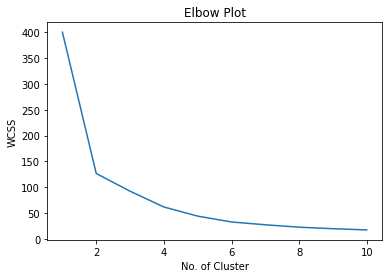

In [4]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state= 123)
  kmeans.fit(X_sc)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('No. of Cluster')
plt.ylabel('WCSS')

plt.show()

In [31]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters=2, init= 'k-means++', random_state= 123)
y_kmeans = kmeans.fit_predict(X_sc)

In [32]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [33]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


In [34]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


### Plot the clusters including the centroid for each of the clusters as defined by K-Means

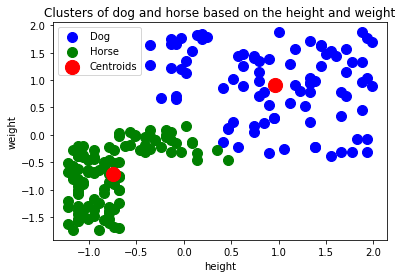

In [35]:
plt.scatter(X_sc[y_kmeans == 0, 0], X_sc[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Dog')

plt.scatter(X_sc[y_kmeans == 1, 0], X_sc[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Horse')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')

plt.title('Clusters of dog and horse based on the height and weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'] = df_dh['type'].map({'dog':1, 'horse':0})

In [ ]:
# Calculate the number of correct predictions
(df_dh['type'] == df_dh['kmean_prid']).value_counts()

True     187
False     13
dtype: int64

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_dh['type'], df_dh['kmean_prid'])*100

93.5

# Seattle Weather KMeans Challenge

In [15]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [16]:
# Scale Data
sc = StandardScaler()
# Fit & transform data.
X_sea_sc = sc.fit_transform(X_sea)

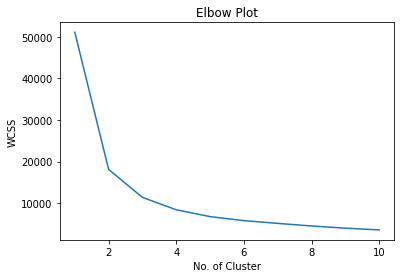

In [17]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state= 123)
  kmeans.fit(X_sea_sc)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('No. of Cluster')
plt.ylabel('WCSS')

plt.show()


# From the plot we can see that the optimal number of clusters in 4, but our target is 2 so we should pick 2.

In [18]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_sea = KMeans(n_clusters=2, init= 'k-means++', random_state= 123)
y_sea_kmeans = kmeans_sea.fit_predict(X_sea_sc)

In [19]:
print(y_sea_kmeans)

[1 1 1 ... 1 1 1]


In [20]:
# assign the y_kmeans to a new column
df_sea['kmean_sea_prid']= y_sea_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_sea_prid
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,1
25547,2017-12-11,0.00,49,29,False,1
25548,2017-12-12,0.00,46,32,False,1
25549,2017-12-13,0.00,48,34,False,1


In [21]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea['rain'] = df_sea['rain'].map({True:1, False:0})

In [22]:
# Calculate the number of correct predictions
(df_sea['rain'] == df_sea['kmean_sea_prid']).value_counts()

True     16266
False     9285
dtype: int64

In [23]:
df_sea.dropna(subset = ['rain'], inplace=True)

In [24]:
df_sea['rain'].isna().sum()

0

### Plot the clusters including the centroid for each of the clusters as defined by K-Means

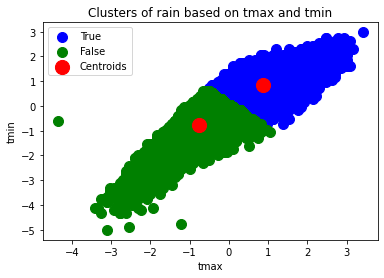

In [26]:
plt.scatter(X_sea_sc[y_sea_kmeans == 0, 0], X_sea_sc[y_sea_kmeans == 0, 1], s = 100, c = 'blue', label = 'True')

plt.scatter(X_sea_sc[y_sea_kmeans == 1, 0], X_sea_sc[y_sea_kmeans == 1, 1], s = 100, c = 'green', label = 'False')


plt.scatter(kmeans_sea.cluster_centers_[:, 0], kmeans_sea.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')

plt.title('Clusters of rain based on tmax and tmin')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_sea['rain'], df_sea['kmean_sea_prid'])*100

63.66838891498357

# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

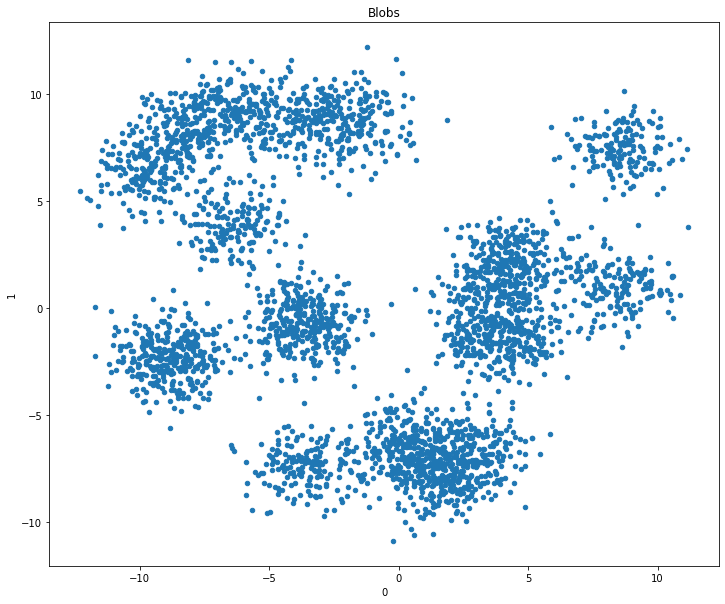

In [39]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [40]:
# Scale Data
sc_blb = StandardScaler()
# Fit & transform data.
X_blb_sc = sc.fit_transform(df_blob)

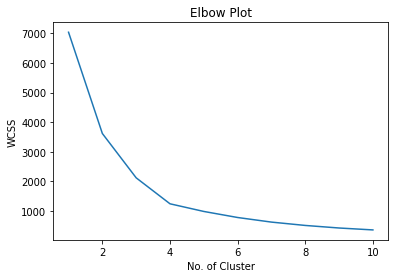

In [41]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state= 123)
  kmeans.fit(X_blb_sc)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('No. of Cluster')
plt.ylabel('WCSS')

plt.show()

In [56]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_blb = KMeans(n_clusters=4, init= 'k-means++', random_state= 123)
y_blb_kmeans = kmeans_blb.fit_predict(X_blb_sc)

In [57]:
print(y_blb_kmeans)

[2 0 2 ... 1 3 3]


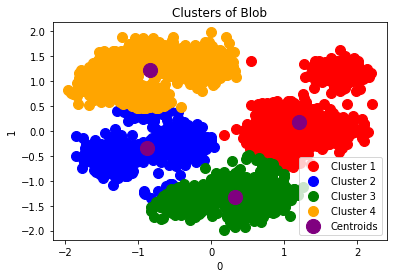

In [58]:
# Plot the clusters 
plt.scatter(X_blb_sc[y_blb_kmeans == 0, 0], X_blb_sc[y_blb_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_blb_sc[y_blb_kmeans == 1, 0], X_blb_sc[y_blb_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X_blb_sc[y_blb_kmeans == 2, 0], X_blb_sc[y_blb_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X_blb_sc[y_blb_kmeans == 3, 0], X_blb_sc[y_blb_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')


plt.scatter(kmeans_blb.cluster_centers_[:, 0], kmeans_blb.cluster_centers_[:, 1], s = 200, c = 'purple', label = 'Centroids')

plt.title('Clusters of Blob')
plt.xlabel('0')
plt.ylabel('1')
plt.legend()
plt.show()